<a href="https://colab.research.google.com/github/Gene9513/Diplomado/blob/main/Tarea%20fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


In [4]:
df = pd.read_csv('fraud test.csv')

In [4]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73283 entries, 0 to 73282
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  73283 non-null  int64  
 1   cc_num      73283 non-null  float64
 2   merchant    73283 non-null  object 
 3   category    73282 non-null  object 
 4   amt         73282 non-null  float64
 5   first       73282 non-null  object 
 6   last        73282 non-null  object 
 7   gender      73282 non-null  object 
 8   street      73282 non-null  object 
 9   city        73282 non-null  object 
 10  state       73282 non-null  object 
 11  zip         73282 non-null  float64
 12  lat         73282 non-null  float64
 13  long        73282 non-null  float64
 14  city_pop    73282 non-null  float64
 15  job         73282 non-null  object 
 16  dob         73282 non-null  object 
 17  trans_num   73282 non-null  object 
 18  unix_time   73282 non-null  float64
 19  merch_lat   73282 non-nul

In [6]:
print(df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 1
category                 1
amt                      1
first                    1
last                     1
gender                   1
street                   1
city                     1
state                    1
zip                      1
lat                      1
long                     1
city_pop                 1
job                      1
dob                      1
trans_num                1
unix_time                1
merch_lat                1
merch_long               1
is_fraud                 1
dtype: int64


In [8]:
df = df.dropna()

is_fraud
0.0    448396
1.0      1984
Name: count, dtype: int64


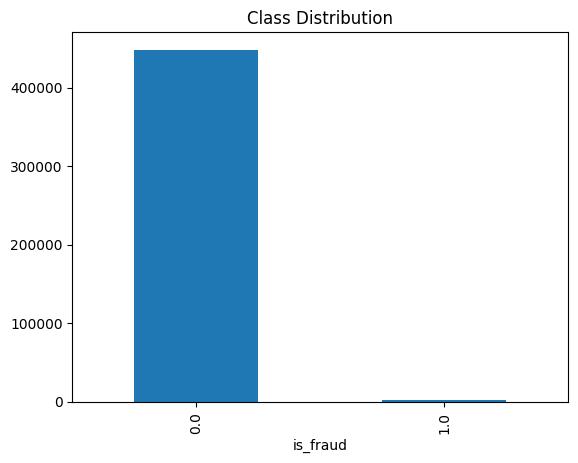

In [9]:
class_counts = df['is_fraud'].value_counts()
print(class_counts)
class_counts.plot(kind='bar', title='Class Distribution')
plt.show()

In [11]:
df_corr = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)

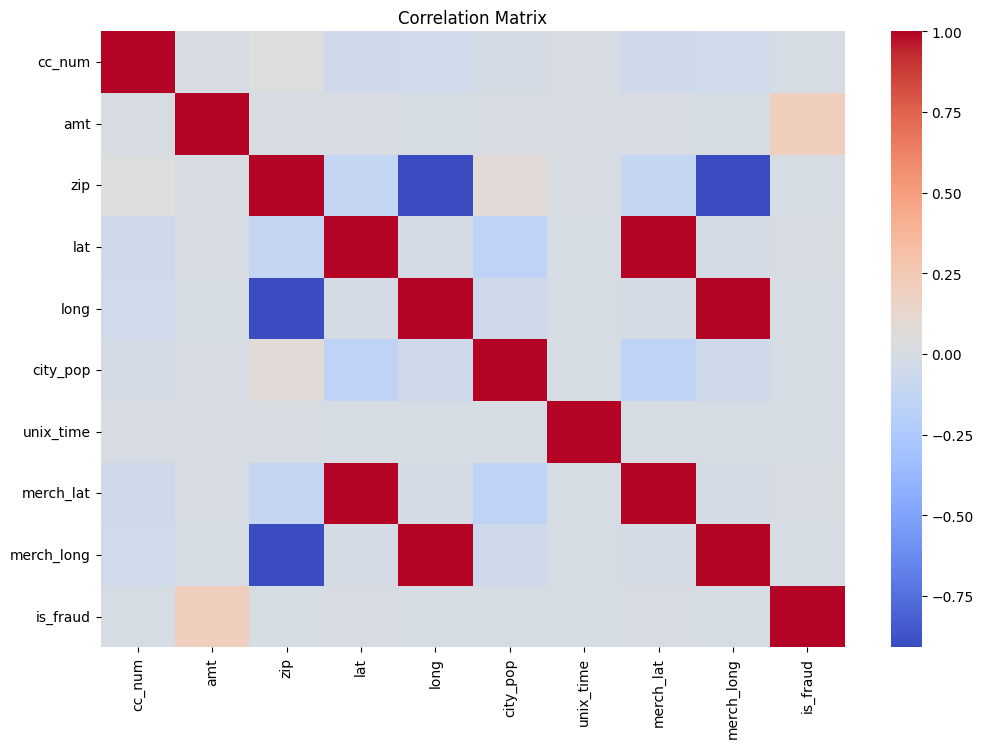

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_corr.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Matrix')
plt.show()

In [14]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [15]:
df = df.drop(['Unnamed: 0', 'trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num'], axis=1)


In [16]:
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
y_pred_rf = rf_model.predict(X_test)

In [22]:
X_test_rf = pd.DataFrame(X_test, columns=X.columns)
X_test_rf['Predicted_Class'] = y_pred_rf

In [23]:
print("--- Random Forest ---")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

--- Random Forest ---
[[89614    27]
 [  226   209]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89641
         1.0       0.89      0.48      0.62       435

    accuracy                           1.00     90076
   macro avg       0.94      0.74      0.81     90076
weighted avg       1.00      1.00      1.00     90076



In [24]:
print(X_test_rf.head())

     cc_num       amt       zip       lat      long  city_pop  unix_time  \
0 -0.319134 -0.462981 -0.559339 -2.050884  0.603029  0.495348   1.552915   
1  2.801923 -0.125750  0.998639 -1.218665 -0.337601 -0.212536   1.626454   
2 -0.315498  0.375630  0.737283  0.623396 -0.492147 -0.290640   0.437022   
3 -0.316470 -0.417494  0.029672  1.129069  0.380163 -0.290430   0.174894   
4 -0.315438 -0.267803  0.063286  0.772121 -0.359998 -0.291232  -0.543334   

   merch_lat  merch_long  Predicted_Class  
0  -2.107193    0.592204              0.0  
1  -1.337315   -0.282321              0.0  
2   0.642420   -0.464524              0.0  
3   1.279515    0.417739              0.0  
4   0.835522   -0.398346              0.0  


In [26]:
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [27]:
y_pred_lr = lr_model.predict(X_test)

In [28]:
X_test_lr = pd.DataFrame(X_test, columns=X.columns)
X_test_lr['Predicted_Class'] = y_pred_lr

In [29]:
print("--- Logistic Regression ---")
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

--- Logistic Regression ---
[[89603    38]
 [  435     0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89641
         1.0       0.00      0.00      0.00       435

    accuracy                           0.99     90076
   macro avg       0.50      0.50      0.50     90076
weighted avg       0.99      0.99      0.99     90076



In [30]:
print(X_test_lr.head())

     cc_num       amt       zip       lat      long  city_pop  unix_time  \
0 -0.319134 -0.462981 -0.559339 -2.050884  0.603029  0.495348   1.552915   
1  2.801923 -0.125750  0.998639 -1.218665 -0.337601 -0.212536   1.626454   
2 -0.315498  0.375630  0.737283  0.623396 -0.492147 -0.290640   0.437022   
3 -0.316470 -0.417494  0.029672  1.129069  0.380163 -0.290430   0.174894   
4 -0.315438 -0.267803  0.063286  0.772121 -0.359998 -0.291232  -0.543334   

   merch_lat  merch_long  Predicted_Class  
0  -2.107193    0.592204              0.0  
1  -1.337315   -0.282321              0.0  
2   0.642420   -0.464524              0.0  
3   1.279515    0.417739              0.0  
4   0.835522   -0.398346              0.0  


In [31]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred_knn = knn_model.predict(X_test)

In [33]:
X_test_knn = pd.DataFrame(X_test, columns=X.columns)
X_test_knn['Predicted_Class'] = y_pred_knn

In [34]:
print("--- K-Nearest Neighbors ---")
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

--- K-Nearest Neighbors ---
[[89547    94]
 [  253   182]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89641
         1.0       0.66      0.42      0.51       435

    accuracy                           1.00     90076
   macro avg       0.83      0.71      0.76     90076
weighted avg       1.00      1.00      1.00     90076



In [35]:
print(X_test_knn.head())

     cc_num       amt       zip       lat      long  city_pop  unix_time  \
0 -0.319134 -0.462981 -0.559339 -2.050884  0.603029  0.495348   1.552915   
1  2.801923 -0.125750  0.998639 -1.218665 -0.337601 -0.212536   1.626454   
2 -0.315498  0.375630  0.737283  0.623396 -0.492147 -0.290640   0.437022   
3 -0.316470 -0.417494  0.029672  1.129069  0.380163 -0.290430   0.174894   
4 -0.315438 -0.267803  0.063286  0.772121 -0.359998 -0.291232  -0.543334   

   merch_lat  merch_long  Predicted_Class  
0  -2.107193    0.592204              0.0  
1  -1.337315   -0.282321              0.0  
2   0.642420   -0.464524              0.0  
3   1.279515    0.417739              0.0  
4   0.835522   -0.398346              0.0  


In [36]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [37]:
y_pred_nb = nb_model.predict(X_test)

In [38]:
X_test_nb = pd.DataFrame(X_test, columns=X.columns)
X_test_nb['Predicted_Class'] = y_pred_nb

In [39]:
print("--- Naive Bayes ---")
print(confusion_matrix(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

--- Naive Bayes ---
[[89074   567]
 [  224   211]]
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     89641
         1.0       0.27      0.49      0.35       435

    accuracy                           0.99     90076
   macro avg       0.63      0.74      0.67     90076
weighted avg       0.99      0.99      0.99     90076



In [40]:
print(X_test_nb.head())

     cc_num       amt       zip       lat      long  city_pop  unix_time  \
0 -0.319134 -0.462981 -0.559339 -2.050884  0.603029  0.495348   1.552915   
1  2.801923 -0.125750  0.998639 -1.218665 -0.337601 -0.212536   1.626454   
2 -0.315498  0.375630  0.737283  0.623396 -0.492147 -0.290640   0.437022   
3 -0.316470 -0.417494  0.029672  1.129069  0.380163 -0.290430   0.174894   
4 -0.315438 -0.267803  0.063286  0.772121 -0.359998 -0.291232  -0.543334   

   merch_lat  merch_long  Predicted_Class  
0  -2.107193    0.592204              0.0  
1  -1.337315   -0.282321              0.0  
2   0.642420   -0.464524              0.0  
3   1.279515    0.417739              0.0  
4   0.835522   -0.398346              0.0  


In [41]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [42]:
y_pred_svm = svm_model.predict(X_test)

In [43]:
X_test_svm = pd.DataFrame(X_test, columns=X.columns)
X_test_svm['Predicted_Class'] = y_pred_svm

In [44]:
print("--- Support Vector Machine ---")
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

--- Support Vector Machine ---
[[89596    45]
 [  331   104]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89641
         1.0       0.70      0.24      0.36       435

    accuracy                           1.00     90076
   macro avg       0.85      0.62      0.68     90076
weighted avg       0.99      1.00      0.99     90076



In [45]:
print(X_test_svm.head())

     cc_num       amt       zip       lat      long  city_pop  unix_time  \
0 -0.319134 -0.462981 -0.559339 -2.050884  0.603029  0.495348   1.552915   
1  2.801923 -0.125750  0.998639 -1.218665 -0.337601 -0.212536   1.626454   
2 -0.315498  0.375630  0.737283  0.623396 -0.492147 -0.290640   0.437022   
3 -0.316470 -0.417494  0.029672  1.129069  0.380163 -0.290430   0.174894   
4 -0.315438 -0.267803  0.063286  0.772121 -0.359998 -0.291232  -0.543334   

   merch_lat  merch_long  Predicted_Class  
0  -2.107193    0.592204              0.0  
1  -1.337315   -0.282321              0.0  
2   0.642420   -0.464524              0.0  
3   1.279515    0.417739              0.0  
4   0.835522   -0.398346              0.0  


In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)


**Entrenamiento y Evaluación de Modelos**

Random Forest y Support Vector Machines (SVM) son generalmente los mejores modelos para este tipo de problemas debido a su alta precisión y capacidad para manejar grandes conjuntos de datos con múltiples características. Sin embargo, Random Forest puede ser preferible debido a su capacidad para manejar datos no lineales de manera eficiente y su menor complejidad computacional en comparación con SVM.

Si se necesita un modelo más interpretable y fácil de implementar, Logistic Regression y Decision Trees también son buenas opciones.